<a href="https://colab.research.google.com/github/TrzeciakPiotr2300/Uczenie_Maszynowe_2025/blob/main/HW03_Trzeciak_Piotr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework nr 3

1.   What does 'good treshold' actually mean?
2.   Calculating optimal treshold with python.


# 1. WHat does it mean to have good treshold?

Short anwser: Usually when we think about evaluating our model we use on of several metrics like: accuracy, precision, recall, specificity, f1 score. When we think abouth treshold's one may think that we should always aim for best accuracy of the model - the more accurate guesses - the better. But it's frequently not the case and it depends of the context. Let's see 3 examples:

1. Patients with cancer.
2. Fraud detection.
3. Recommendation system (like Allegro) but this time with both: users that want best recomendations AND owners of products who pay for their products to be recommended to users.

In first example we focus on patients with cancer. Telling a healthy patient that he's got cancer (false positive) is less harmfull than telling a patient with a cancer that he's healthy. So in this situation we should focus on SPECIFICITY (or PRECISION).

In second missdiagnosing could lead to huge finantial loss. We focus on RECALL.

In last example we should consider both - pushing 'good' items and those patrons paid us to push. Here we could use $F_{beta}$ score that combines those two needs in specific proportion.

# 2. Calculating optimal treshold with python.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, RocCurveDisplay
from sklearn.metrics import precision_score

# Data
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Predict probabilities
y_probs = model.predict_proba(X_test)[:, 1]

In [19]:
thresholds = np.arange(0, 1, 0.05)
results = []

for thresh in thresholds:
    y_pred = (y_probs >= thresh).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    tnr = tn / (tn + fp)  # Specificity
    results.append({'threshold': thresh, 'tnr': tnr})

tnr_df = pd.DataFrame(results)

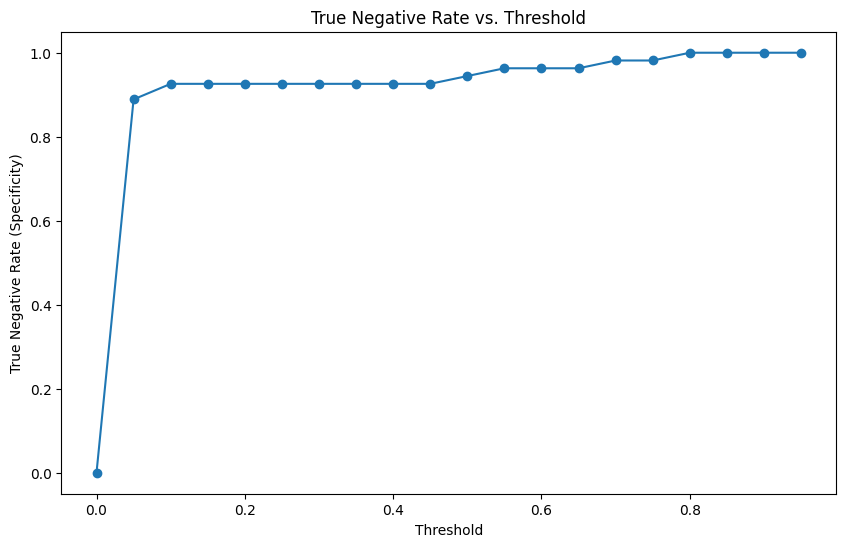

In [20]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(tnr_df['threshold'], tnr_df['tnr'], marker='o')
ax.set_xlabel('Threshold')
ax.set_ylabel('True Negative Rate (Specificity)')
ax.set_title('True Negative Rate vs. Threshold')
plt.show()

In [21]:
print(tnr_df)

    threshold       tnr
0        0.00  0.000000
1        0.05  0.888889
2        0.10  0.925926
3        0.15  0.925926
4        0.20  0.925926
5        0.25  0.925926
6        0.30  0.925926
7        0.35  0.925926
8        0.40  0.925926
9        0.45  0.925926
10       0.50  0.944444
11       0.55  0.962963
12       0.60  0.962963
13       0.65  0.962963
14       0.70  0.981481
15       0.75  0.981481
16       0.80  1.000000
17       0.85  1.000000
18       0.90  1.000000
19       0.95  1.000000


As we can see, using treshold = 0.5 is NOT the best when we want to have high SPECIFICITY. Here we got 100% TNR when aplying 0.8, but it doesn't need to hold with bigger datasets. The most important case is minimizing the number of ill patients who are told they are healthy!